In [1]:
pip install requests bs4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
from bs4 import BeautifulSoup

In [18]:
url = 'https://books.toscrape.com/catalogue/page-1.html'
headers = {
    'User-Agent': 'Mozilla/5.0'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
# text = soup.find('form', class_='form-horizontal').find('strong').parent.text.strip()
# /html/body/div/div/div/div/section/div[2]/ol/li[1]/article/h3/a
text = soup.find('article', class_='product_pod').find('h3').text
print(text)

A Light in the ...


In [19]:
first_book =soup.find('article', class_ = 'product_pod')
title = first_book.h3.a['title']
print("첫 번째 책의 제목:", title)

첫 번째 책의 제목: A Light in the Attic


In [24]:
p_tag = soup.find('article', class_='product_pod').find('p', class_='star-rating')
classes = p_tag.get('class')
star_rating = [c for c in classes if c != 'star-rating'][0]
print(star_rating)

Three


In [25]:
price = soup.find('article', class_='product_pod').find('p', class_='price_color').text
print(price)

Â£51.77


In [31]:
books = soup.find_all('article', class_='product_pod')

for i, book in enumerate(books, 1):
    title = book.h3.a['title']
    classes = book.find('p', class_='star-rating').get('class')
    star_rating = [c for c in classes if c != 'star-rating'][0]
    price = book.find('p', class_='price_color').text

    print(f"제목: {title}\n별점: {star_rating}\n가격: {price}\n------------------------------------------------------")

제목: A Light in the Attic
별점: Three
가격: Â£51.77
------------------------------------------------------
제목: Tipping the Velvet
별점: One
가격: Â£53.74
------------------------------------------------------
제목: Soumission
별점: One
가격: Â£50.10
------------------------------------------------------
제목: Sharp Objects
별점: Four
가격: Â£47.82
------------------------------------------------------
제목: Sapiens: A Brief History of Humankind
별점: Five
가격: Â£54.23
------------------------------------------------------
제목: The Requiem Red
별점: One
가격: Â£22.65
------------------------------------------------------
제목: The Dirty Little Secrets of Getting Your Dream Job
별점: Four
가격: Â£33.34
------------------------------------------------------
제목: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
별점: Three
가격: Â£17.93
------------------------------------------------------
제목: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
별점: 

In [37]:
books = soup.find_all('article', class_= 'product_pod')

for book in books:
    title = book.h3.a['title']
    star_rating = book.p['class'][1]
    price = book. find('p', class_= 'price_color').text
    
    print(f"제목: {title}")
    print(f"별점: {star_rating}")
    print(f"가격: {price}")
    print("-" * 50)

제목: A Light in the Attic
별점: Three
가격: Â£51.77
--------------------------------------------------
제목: Tipping the Velvet
별점: One
가격: Â£53.74
--------------------------------------------------
제목: Soumission
별점: One
가격: Â£50.10
--------------------------------------------------
제목: Sharp Objects
별점: Four
가격: Â£47.82
--------------------------------------------------
제목: Sapiens: A Brief History of Humankind
별점: Five
가격: Â£54.23
--------------------------------------------------
제목: The Requiem Red
별점: One
가격: Â£22.65
--------------------------------------------------
제목: The Dirty Little Secrets of Getting Your Dream Job
별점: Four
가격: Â£33.34
--------------------------------------------------
제목: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
별점: Three
가격: Â£17.93
--------------------------------------------------
제목: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
별점: Four
가격: Â£22.60
---------------

In [57]:
import pandas as pd
books = soup.find_all('article', class_= 'product_pod')

rating_map = {'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5}

book_data = []

for book in books:
    title = book.h3.a['title']
    star_rating = book.p['class'][1]
    star_num = rating_map.get(star_rating,0)
    price = book.find('p', class_= 'price_color').text.replace('Â','').strip()
    
    book_data.append({
        "Title": title,
        "Star Rating": star_num,
        "Price": price
    })
    
df = pd.DataFrame(book_data)
print(df)

                                                Title  Star Rating   Price
0                                A Light in the Attic            3  £51.77
1                                  Tipping the Velvet            1  £53.74
2                                          Soumission            1  £50.10
3                                       Sharp Objects            4  £47.82
4               Sapiens: A Brief History of Humankind            5  £54.23
5                                     The Requiem Red            1  £22.65
6   The Dirty Little Secrets of Getting Your Dream...            4  £33.34
7   The Coming Woman: A Novel Based on the Life of...            3  £17.93
8   The Boys in the Boat: Nine Americans and Their...            4  £22.60
9                                     The Black Maria            1  £52.15
10     Starving Hearts (Triangular Trade Trilogy, #1)            2  £13.99
11                              Shakespeare's Sonnets            4  £20.66
12                       

In [3]:
import matplotlib.pyplot as plt
rating_counts = df['Star Rating'].value_counts().sort_index()

NameError: name 'df' is not defined

별점 분포표:
Star Rating
1    6
2    3
3    3
4    4
5    4
Name: count, dtype: int64


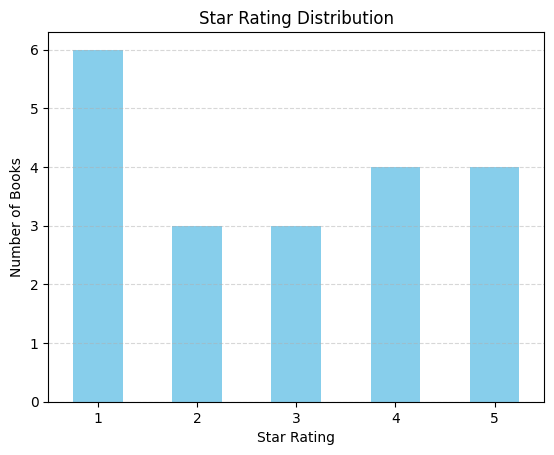

In [59]:
print("별점 분포표:")
print(rating_counts)

rating_counts.plot(kind='bar', color='skyblue')
plt.title('Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [69]:
urls = [str(i) for i in range(1, 6)]
for i, url_num in enumerate(urls, 1):
    print(f"[페이지: {i}]")
    url2 = 'https://books.toscrape.com/catalogue/page-'+url_num+'.html'
    headers2 = {
        'User-Agent': 'Mozilla/5.0'
    }
    response2 = requests.get(url2, headers=headers2)
    soup2 = BeautifulSoup(response2.text, 'html.parser')
    
    books2 = soup2.find_all('article', class_= 'product_pod')
    
    for j, book in enumerate(books2, 1):
        title = book.h3.a['title']
        
        print(f"{j}. {title}")

[페이지: 1]
1. A Light in the Attic
2. Tipping the Velvet
3. Soumission
4. Sharp Objects
5. Sapiens: A Brief History of Humankind
6. The Requiem Red
7. The Dirty Little Secrets of Getting Your Dream Job
8. The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
9. The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
10. The Black Maria
11. Starving Hearts (Triangular Trade Trilogy, #1)
12. Shakespeare's Sonnets
13. Set Me Free
14. Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
15. Rip it Up and Start Again
16. Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
17. Olio
18. Mesaerion: The Best Science Fiction Stories 1800-1849
19. Libertarianism for Beginners
20. It's Only the Himalayas
[페이지: 2]
1. In Her Wake
2. How Music Works
3. Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Small Batch Jams, Jellies, P

In [86]:
import requests
from bs4 import BeautifulSoup

base_url = "https://books.toscrape.com/catalogue/page-{}.html"

all_titles = []
page_titles = []

for page_num in range(1, 6):
    url3 = base_url.format(page_num)
    response3 = requests.get(url3)
    soup3 = BeautifulSoup(response3.text, 'html.parser')
    
    books = soup3.find_all('article', class_= 'product_pod')
    print(f"\n[페이지: {page_num}]")
    for idx, book in enumerate(books, start=1):
        title = book.h3.a['title']
        print(f"{idx}. {title}")
        all_titles.append(title)
        page_titles.append([page_num,title])


[페이지: 1]
1. A Light in the Attic
2. Tipping the Velvet
3. Soumission
4. Sharp Objects
5. Sapiens: A Brief History of Humankind
6. The Requiem Red
7. The Dirty Little Secrets of Getting Your Dream Job
8. The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
9. The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
10. The Black Maria
11. Starving Hearts (Triangular Trade Trilogy, #1)
12. Shakespeare's Sonnets
13. Set Me Free
14. Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
15. Rip it Up and Start Again
16. Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
17. Olio
18. Mesaerion: The Best Science Fiction Stories 1800-1849
19. Libertarianism for Beginners
20. It's Only the Himalayas

[페이지: 2]
1. In Her Wake
2. How Music Works
3. Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Small Batch Jams, Jellies,

In [ ]:
pip install openpyxl

In [83]:
df_titles = pd.DataFrame({'Title': all_titles})
df.to_excel("book_titles_page1_to_5.xlsx", index=False)
print("엑셀 저장이 완료되었습니다 ~!! ")

엑셀 저장이 완료되었습니다 ~!! 


In [93]:
df_page_titles = pd.DataFrame(page_titles, columns=['Page', 'Title'])
df_page_titles.to_excel("book_titles_page1_to_6.xlsx", index=False)
print("엑셀 저장이 완료되었습니다 ~!! ")

엑셀 저장이 완료되었습니다 ~!! 


In [94]:
all_books = []
for page_num in range(1, 6):
    url = f"https://books.toscrape.com/catalogue/page-{page_num}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    books = soup. find_all('article', class_='product_pod')
    for book in books:
        title = book.h3.a['title']
        all_books.append({
        "Page": page_num,
        "Title": title
        })
    
df = pd.DataFrame(all_books)
df.to_excel("books_5_pages.xlsx", index=False)
print("모든 페이지 저장 완료: books_5_pages.xlsx")

모든 페이지 저장 완료: books_5_pages.xlsx


In [121]:
import re
num = 1000
for page_num in range(1, 2):
    url = f"http://books.toscrape.com/catalogue/page-1.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_='product_pod')
    for book in books:
        title = book.h3.a['title']
        clean_title = re.sub(r"-+", "-", re.sub(r"[ \[\]#:,)]", "-", re.sub(r"\(.*?\)", "", title))).lower()
        print(title)
        url2 = f"http://books.toscrape.com/catalogue/"+clean_title+"_"+str(num)+"/index.html"
        print(url2)
        response2 = requests.get(url2)
        soup2 = BeautifulSoup(response2.text, 'html.parser')
        breadcrumb_items = soup2.find('ul', class_='breadcrumb').find_all('li')
        # print(breadcrumb_items)
        bread = breadcrumb_items[2].a.text.strip()
        print(f"제목:{title} | 장르: {bread}")
        num -= 1

A Light in the Attic
http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html
제목:A Light in the Attic | 장르: Poetry
Tipping the Velvet
http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html
제목:Tipping the Velvet | 장르: Historical Fiction
Soumission
http://books.toscrape.com/catalogue/soumission_998/index.html
제목:Soumission | 장르: Fiction
Sharp Objects
http://books.toscrape.com/catalogue/sharp-objects_997/index.html
제목:Sharp Objects | 장르: Mystery
Sapiens: A Brief History of Humankind
http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html
제목:Sapiens: A Brief History of Humankind | 장르: History
The Requiem Red
http://books.toscrape.com/catalogue/the-requiem-red_995/index.html
제목:The Requiem Red | 장르: Young Adult
The Dirty Little Secrets of Getting Your Dream Job
http://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html
제목:The Dirty Little Secrets of Getting Your Dream Job | 장르: Business

AttributeError: 'NoneType' object has no attribute 'find_all'

In [125]:
page_url = 'https://books.toscrape.com/catalogue/page-1.html'
base_url = 'https://books.toscrape.com/catalogue/'

headers = {
'User-Agent': 'Mozilla/5.0'
}
response = requests.get(page_url, headers=headers)
soup = BeautifulSoup(response.text,'html.parser')

books = soup.find_all('article', class_='product_pod')

for book in books:
    book_href = book.h3.a['href']
    book_link = base_url + book_href
    
    res = requests.get(book_link, headers=headers)
    book_soup = BeautifulSoup(res.text,'html.parser')
    
    title = book_soup.find('div', class_='product_main').h1.text
    category = book_soup. select('ul.breadcrumb li')[2].text.strip()
    
    print(f"제목: {title} | 장르: {category}")

제목: A Light in the Attic | 장르: Poetry
제목: Tipping the Velvet | 장르: Historical Fiction
제목: Soumission | 장르: Fiction
제목: Sharp Objects | 장르: Mystery
제목: Sapiens: A Brief History of Humankind | 장르: History
제목: The Requiem Red | 장르: Young Adult
제목: The Dirty Little Secrets of Getting Your Dream Job | 장르: Business
제목: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull | 장르: Default
제목: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics | 장르: Default
제목: The Black Maria | 장르: Poetry
제목: Starving Hearts (Triangular Trade Trilogy, #1) | 장르: Default
제목: Shakespeare's Sonnets | 장르: Poetry
제목: Set Me Free | 장르: Young Adult
제목: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) | 장르: Sequential Art
제목: Rip it Up and Start Again | 장르: Music
제목: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 | 장르: Music
제목: Olio | 장르: Poetry
제목: Mesaerion: The Best Science Fiction Stories 1800-18

In [127]:
bread_books = []
for page_num in range(1, 51):
    print(f"\n[페이지: {page_num}]")
    page_url = f"https://books.toscrape.com/catalogue/page-{page_num}.html"
    base_url = 'https://books.toscrape.com/catalogue/'
    
    headers = {
    'User-Agent': 'Mozilla/5.0'
    }
    response = requests.get(page_url, headers=headers)
    soup = BeautifulSoup(response.text,'html.parser')
    
    books = soup.find_all('article', class_='product_pod')
    
    for book in books:
        book_href = book.h3.a['href']
        book_link = base_url + book_href
        
        res = requests.get(book_link, headers=headers)
        book_soup = BeautifulSoup(res.text,'html.parser')
        
        title = book_soup.find('div', class_='product_main').h1.text
        category = book_soup. select('ul.breadcrumb li')[2].text.strip()
        bread_books.append({
            "title": title,
            "category": category
        })
        print(f"제목: {title} | 장르: {category}")
        df = pd.DataFrame(bread_books)
        df.to_excel("bread_books_50_pages.xlsx", index=False)


[페이지: 1]
제목: A Light in the Attic | 장르: Poetry
제목: Tipping the Velvet | 장르: Historical Fiction
제목: Soumission | 장르: Fiction
제목: Sharp Objects | 장르: Mystery
제목: Sapiens: A Brief History of Humankind | 장르: History
제목: The Requiem Red | 장르: Young Adult
제목: The Dirty Little Secrets of Getting Your Dream Job | 장르: Business
제목: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull | 장르: Default
제목: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics | 장르: Default
제목: The Black Maria | 장르: Poetry
제목: Starving Hearts (Triangular Trade Trilogy, #1) | 장르: Default
제목: Shakespeare's Sonnets | 장르: Poetry
제목: Set Me Free | 장르: Young Adult
제목: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) | 장르: Sequential Art
제목: Rip it Up and Start Again | 장르: Music
제목: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 | 장르: Music
제목: Olio | 장르: Poetry
제목: Mesaerion: The Best Science Fiction Stori

In [2]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = 'https://books.toscrape.com/'
catalogue_url = base_url + 'catalogue/page-{}.html'
book_base_url = base_url + 'catalogue/'

headers = {'User-Agent': 'Mozilla/5.0'}
book_list = []
first_page = requests.get(base_url, headers=headers)
soup = BeautifulSoup(first_page.text, 'html.parser')
page_count_string = soup.find('li', class_= 'current'). text
page_count = int(page_count_string.strip().split()[-1])
# for page_no in range(1, page_count + 1):
for page_no in range(1, 3):
    url = catalogue_url.format(page_no)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser' )
    books = soup. find_all('article', class_= 'product_pod')
    for book in books:
        book_href = book.h3.a['href']
        book_link = book_base_url + book_href
        
        res = requests.get(book_link, headers=headers)
        book_soup = BeautifulSoup(res.text, 'html.parser')
        
        title = book_soup. find('div', class_='product_main').h1.text
        category = book_soup.select('ul.breadcrumb li')[2].text.strip()
        
        book_list.append({'title': title, 'category': category})
        print(f"제목: {title} | 장르: {category}")
        time.sleep(0.2)

df = pd.DataFrame(book_list)
df.to_excel('book_categories_test.xlsx', index=False)

제목: A Light in the Attic | 장르: Poetry
제목: Tipping the Velvet | 장르: Historical Fiction
제목: Soumission | 장르: Fiction
제목: Sharp Objects | 장르: Mystery
제목: Sapiens: A Brief History of Humankind | 장르: History
제목: The Requiem Red | 장르: Young Adult
제목: The Dirty Little Secrets of Getting Your Dream Job | 장르: Business
제목: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull | 장르: Default
제목: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics | 장르: Default
제목: The Black Maria | 장르: Poetry
제목: Starving Hearts (Triangular Trade Trilogy, #1) | 장르: Default
제목: Shakespeare's Sonnets | 장르: Poetry
제목: Set Me Free | 장르: Young Adult
제목: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) | 장르: Sequential Art
제목: Rip it Up and Start Again | 장르: Music
제목: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 | 장르: Music
제목: Olio | 장르: Poetry
제목: Mesaerion: The Best Science Fiction Stories 1800-18

<Axes: xlabel='category'>

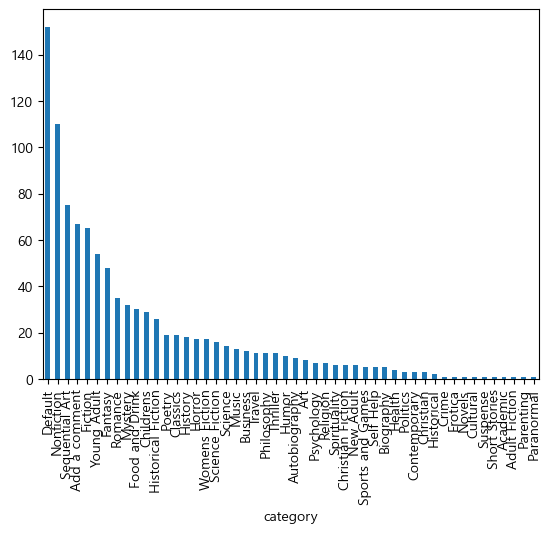

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

categories = pd.read_excel("book_categories.xlsx")
categories.category.value_counts().plot(kind="bar")

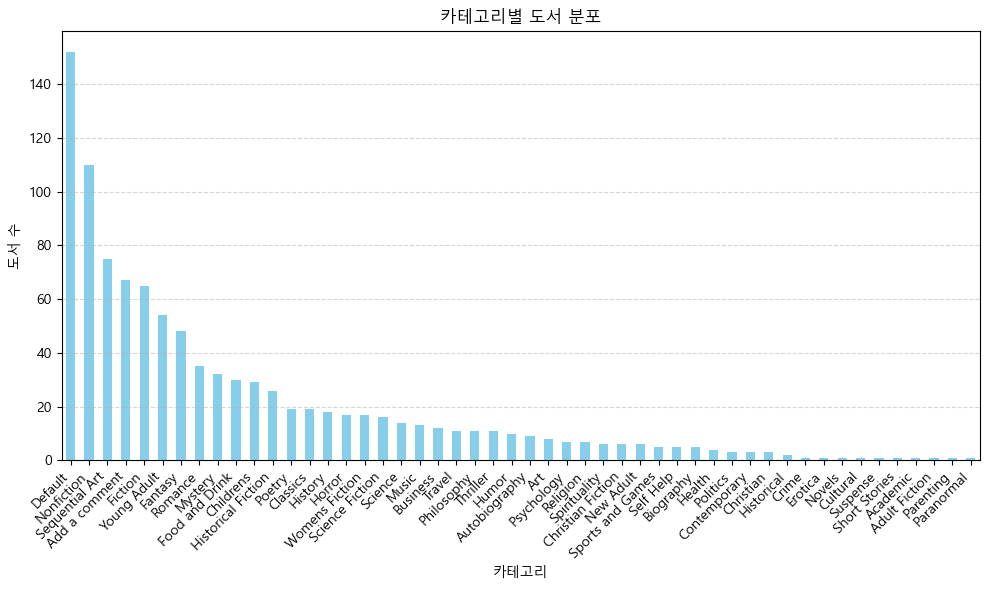

In [12]:
from matplotlib import rcParams

plt.rcParams ['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel("book_categories.xlsx")
category_counts = df['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')

plt.title('카테고리별 도서 분포')
plt.xlabel('카테고리')
plt.ylabel('도서 수')
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

In [20]:
output_file = 'image_links_new.txt'
with open(output_file, 'w') as f:
    pass

# w : 새로 작성 + 기존 내용이 있을 경우 자우고
# r : 읽기 전용, 없는 파일의 경우 o러발생
# a : 이어서 쓰기

headers = {
    'User-Agent': 'Mozilla/5.0'
}
for page in range(1, 3):
    url = f'https://books.toscrape.com/catalogue/page-{page}.html'
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_= 'product_pod' )
    
    for book in books:
        relative_link = book.find('img')['src']
        image_url ='https://books.toscrape.com/' + relative_link.replace('../', '')
        
        with open(output_file, 'a') as f:
            f.write(image_url + '\n')

print("이미지 링크 저장 완료 !! ")

이미지 링크 저장 완료 !! 


In [28]:
# 이미지링크 정보해서 이미지 폴더 만들어 이미지들 저장하기

# response = requests.get(url)
# response.content
# os.makedirs -> book_images
# 'w', 'wb'
# os.path.join()

import os
import requests

os.makedirs("book_images_test", exist_ok=True)


headers = {
    'User-Agent': 'Mozilla/5.0'
}

i = 1

for page in range(1, 3):
    url = f'https://books.toscrape.com/catalogue/page-{page}.html'
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_= 'product_pod' )

    for book in books:
        relative_link = book.find('img')['src']
        image_url ='https://books.toscrape.com/' + relative_link.replace('../', '')
        print(image_url)
        response = requests.get(image_url)
        file_path = os.path.join("book_images_test", str(i)+".jpg")
        i += 1
        with open(file_path, 'wb') as f:
            f.write(response.content)

https://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg
https://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg
https://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg
https://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg
https://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg
https://books.toscrape.com/media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg
https://books.toscrape.com/media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg
https://books.toscrape.com/media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg
https://books.toscrape.com/media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg
https://books.toscrape.com/media/cache/58/46/5846057e28022268153beff6d352b06c.jpg
https://books.toscrape.com/media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg
https://books.toscrape.com/media/cache/10/48/1048f63d3b5061cd2f424d20b3f9b666.jpg
https://books.to

In [36]:
import os
import requests

save_folder = 'book_images'
os.makedirs(save_folder, exist_ok=True)

with open('image_links_new.txt', 'r') as file:
    image_urls = file.readlines()

for idx, url in enumerate(image_urls):
    url = url.strip()
    if not url:
        continue
    try:
        response = requests.get(url)
        if response.status_code == 200: # image_001.jpg
            file_name = f'image_{idx+1:03}.jpg'
            file_path = os.path.join(save_folder, file_name)
        
            with open(file_path, 'wb') as f:
                f.write(response.content)
        else:
            print("다운로드 실패")

    except Exception as e:
        print("오류")

In [46]:
import re
i = 0

base_url = 'https://books.toscrape.com/'
catalogue_url = base_url + 'catalogue/page-{}.html'
book_base_url = base_url + 'catalogue/'
headers = {'User-Agent': 'Mozilla/5.0'}
book_list = []
first_page = requests.get(base_url, headers=headers)
soup = BeautifulSoup(first_page.text, 'html.parser')

rating_map = {'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5}
# page_count_string = soup.find('li', class_= 'current'). text
# page_count = int(page_count_string.strip().split()[-1])
# for page_no in range(1, page_count + 1):
for page_no in range(1, 3):
    url = catalogue_url.format(page_no)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser' )
    books = soup. find_all('article', class_= 'product_pod')
    for book in books:

        star_rating = book.p['class'][1]
        star_num = rating_map.get(star_rating,0)
        price = book.find('p', class_= 'price_color').text.replace('Â','').strip()

        book_href = book.h3.a['href']
        book_link = book_base_url + book_href

        relative_link = book.find('img')['src']
        image_url ='https://books.toscrape.com/' + relative_link.replace('../', '')
        
        res = requests.get(book_link, headers=headers)
        book_soup = BeautifulSoup(res.text, 'html.parser')
        
        title = book_soup.find('div', class_='product_main').h1.text
        category = book_soup.select('ul.breadcrumb li')[2].text.strip()
        
        table = book_soup.find('table', class_='table table-striped')
        rows = table.find_all('tr')
        # /html/body/div/div/div[2]/div[2]/article/table/tbody/tr[1]/td        
        upc = rows[0].td.text.strip()
        # /html/body/div/div/div[2]/div[2]/article/table/tbody/tr[6]/td
        availability =  rows[5].td.text.strip()
        numbers = re.findall(r'\d+', availability)
        in_stock = int(numbers[0]) if numbers else 0

        print(f"' ': {i}, 'name': {title}, 'price': {price}, 'category': {category}, 'stars':{star_num}, 'upc': {upc}, 'availability': {availability}, 'in_stock':{in_stock}, 'image_link':{image_url}")
        book_list.append({' ': i, 'name': title, 'price': price, 'category': category, 'stars':star_num, 'upc': upc, 'availability': availability, 'in_stock':in_stock, 'image_link':image_url})
        i += 1
        time.sleep(0.2)

df = pd.DataFrame(book_list)
df.to_excel('book_test.xlsx', index=False)

' ': 0, 'name': A Light in the Attic, 'price': £51.77, 'category': Poetry, 'stars':3, 'upc': a897fe39b1053632, 'availability': In stock (22 available), 'in_stock':22, 'image_link':https://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg
' ': 1, 'name': Tipping the Velvet, 'price': £53.74, 'category': Historical Fiction, 'stars':1, 'upc': 90fa61229261140a, 'availability': In stock (20 available), 'in_stock':20, 'image_link':https://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg
' ': 2, 'name': Soumission, 'price': £50.10, 'category': Fiction, 'stars':1, 'upc': 6957f44c3847a760, 'availability': In stock (20 available), 'in_stock':20, 'image_link':https://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg
' ': 3, 'name': Sharp Objects, 'price': £47.82, 'category': Mystery, 'stars':4, 'upc': e00eb4fd7b871a48, 'availability': In stock (20 available), 'in_stock':20, 'image_link':https://books.toscrape.com/media/cache/

In [54]:
with open('image_links.txt', 'w') as f:
    pass

book_dict = {
    'name': [],
    'price': [],
    'category': [],
    'stars': [],
    'upc': [],
    'availability': [],
    'in_stock': [],
    'image_link': []
}

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'}
number_dict = {'One': '1', 'Two': '2', 'Three': '3', 'Four': '4', 'Five': '5'}

url = 'https://books.toscrape.com/'
response = requests.get(url, headers=headers)
page_html = response.text
soup = BeautifulSoup(page_html, 'html.parser')

page_count_string = soup.find('li', class_='current').text
page_count = int(page_count_string.strip().split(' ')[-1])

for page_no in range(1, page_count -47):
    page_url = f'https://books.toscrape.com/catalogue/page-{page_no}.html'
    response = requests.get(page_url, headers=headers)
    page_html = response.text
    soup = BeautifulSoup(page_html, 'html.parser')
    books = soup.find_all('article', class_='product_pod')

    for book in books:
        book_url = 'https://books.toscrape.com/catalogue/' + book.find('a')['href']
        response = requests.get(book_url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        name = soup.find('div', class_='product_main').h1.text
        book_dict['name'].append(name)
        
        price = soup.find('div', class_='product_main').p.text
        book_dict['price' ].append(price)
        
        ul_container = soup.find('ul', class_='breadcrumb' )
        li_items = ul_container.find_all('li')
        category = li_items[2].a.text
        book_dict['category'].append(category)

        star_p_element = soup.find('p', class_='star-rating')
        star_class_name_list = star_p_element['class']
        star_string = star_class_name_list[1]
        stars = number_dict[star_string]
        book_dict['stars'].append(stars)
        
        upc_th = soup.find('th', string='UPC')
        upc = upc_th.find_next_sibling().text
        book_dict['upc'].append(upc)

        availability_th = soup. find('th', string='Availability')
        availability = availability_th.find_next_sibling().text
        book_dict['availability'].append(availability)
        in_stock = availability.split('(')[1].split(' ')[0]
        book_dict['in_stock'].append(in_stock)
        
        image_link = 'https://books.toscrape.com/' + soup.find('div', class_= 'thumbnail').img['src'][6:]
        book_dict['image_link'].append(image_link)
        with open('image_links.txt', 'a') as f:
            f.write(image_link + '\n')
            
df = pd.DataFrame(book_dict)
df.to_excel('book_new_short.xlsx')
        

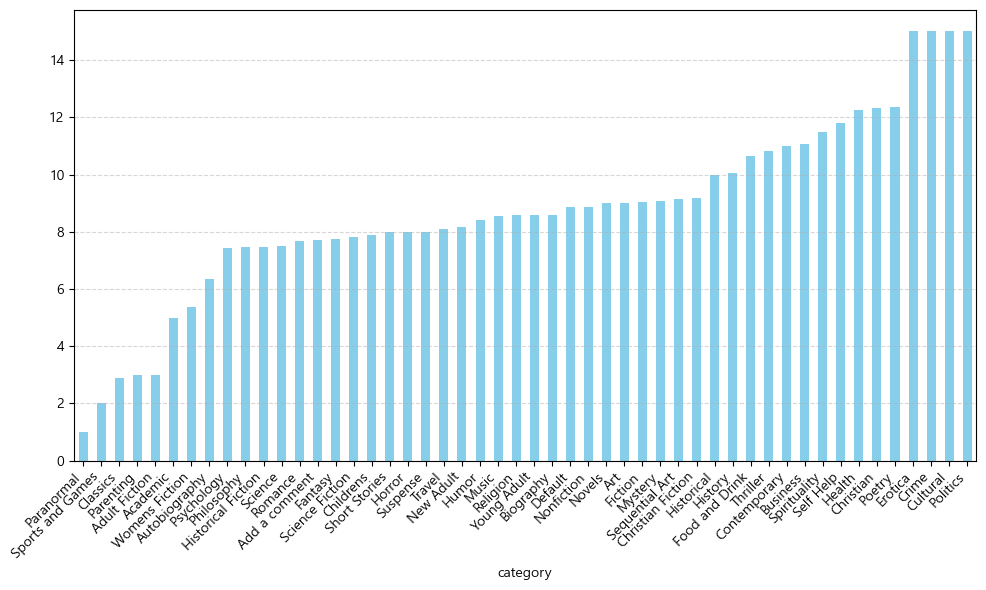

In [61]:
from matplotlib import rcParams

plt.rcParams ['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel("book.xlsx")
category_counts = df.groupby('category')['in_stock'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

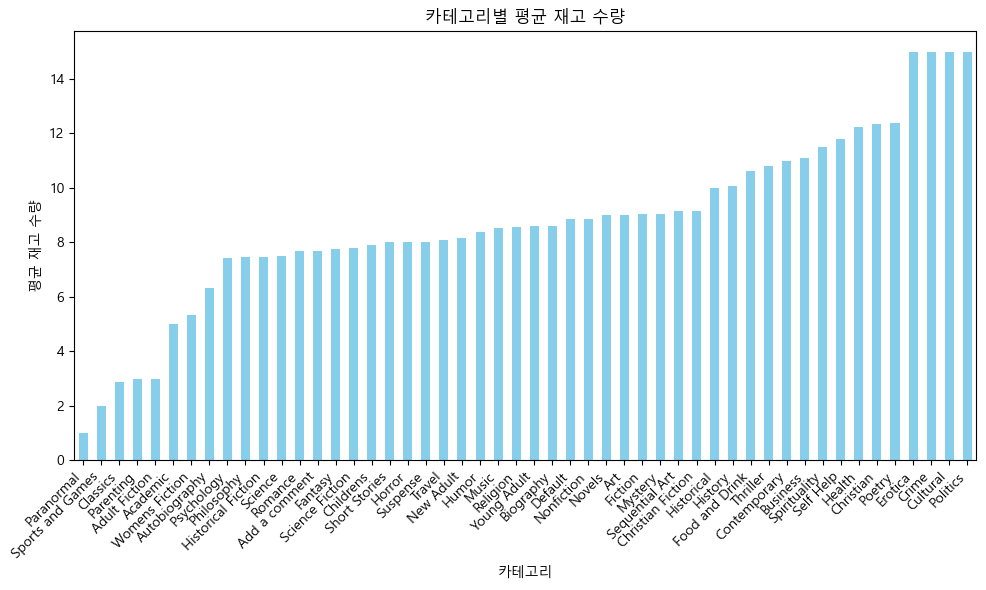

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('book.xlsx')
df['in_stock' ] = df['in_stock'].astype(int)

# 카태고리별 평균 재고수량 계산

avg_stock_by_category = df.groupby('category')['in_stock'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_stock_by_category.plot(kind='bar', color='skyblue')

plt.title("카테고리별 평균 재고 수량")
plt.xlabel("카테고리")
plt.ylabel("평균 재고 수량")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

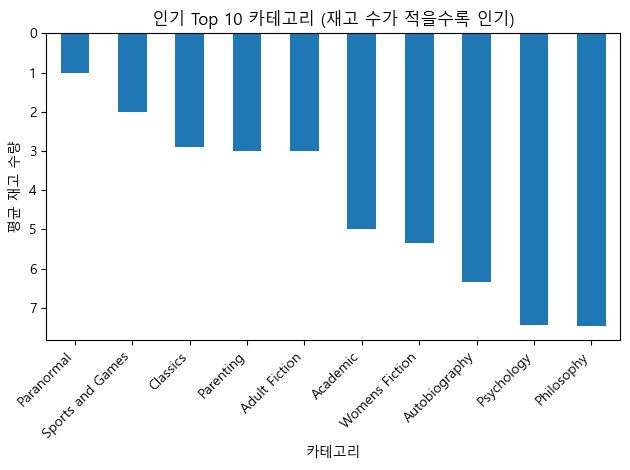

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel("book.xlsx")
avg_stock_by_category = df.groupby('category')['in_stock'].mean().sort_values().head(10)

# 그래프 위에서 아래로 바 형식으로 출력
avg_stock_by_category.plot(kind='bar')

plt.title("인기 Top 10 카테고리 (재고 수가 적을수록 인기)")
plt.xlabel("카테고리")
plt.ylabel("평균 재고 수량")

plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

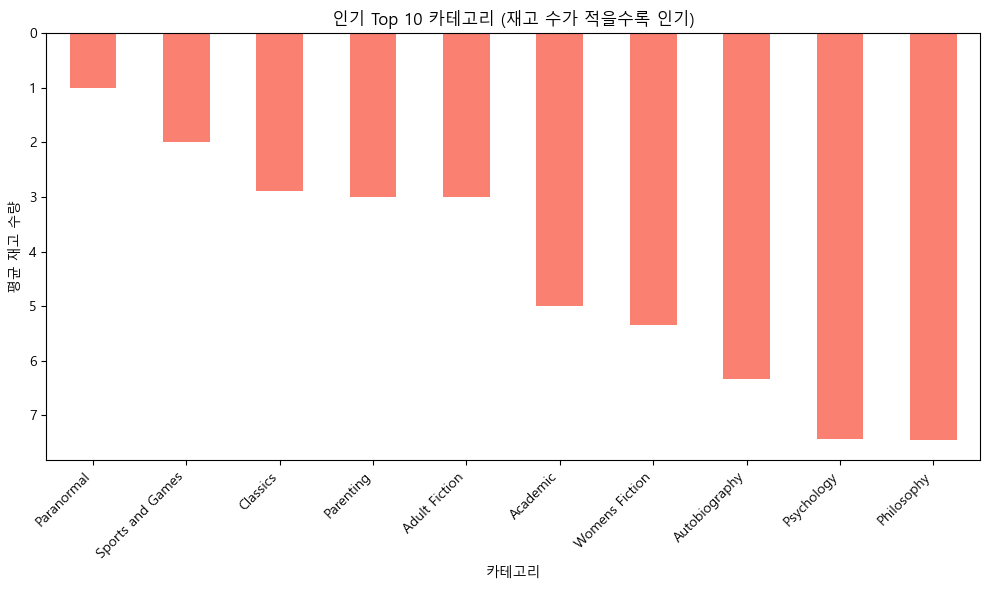

In [73]:
top10_popular_categories = avg_stock_by_category.head(10)

plt.figure(figsize=(10, 6))
top10_popular_categories. plot(kind='bar', color='salmon' )

plt.title("인기 Top 10 카테고리 (재고 수가 적을수록 인기)")
plt.xlabel("카테고리")
plt.ylabel("평균 재고 수량")
plt.xticks(rotation=45, ha='right')
# ax
plt.gca().invert_yaxis() # get current axes
plt.tight_layout()
plt.show()

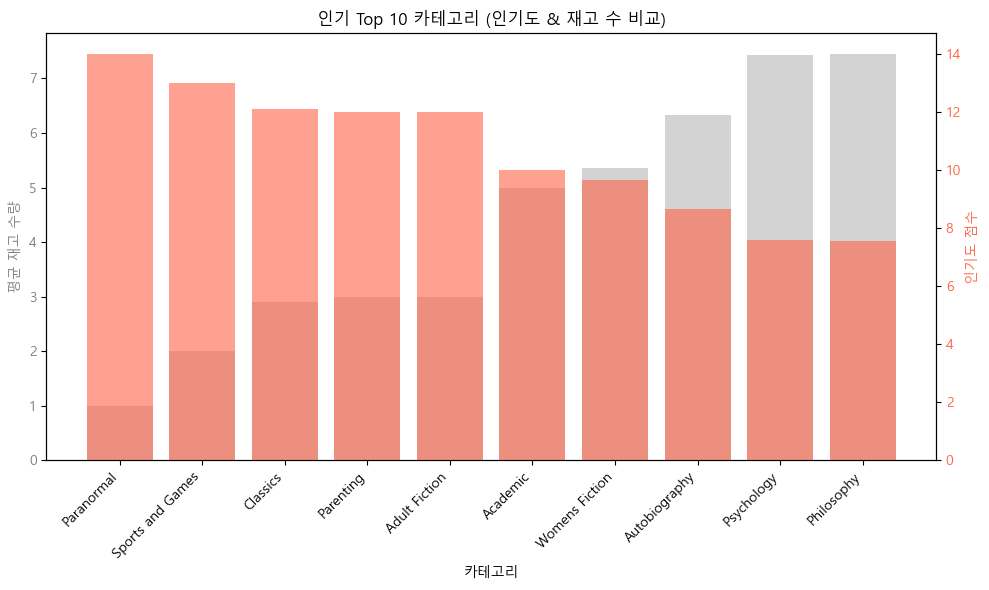

In [77]:
# 2중 Y축 시각화
df = pd.read_excel('book.xlsx')
avg_stock_by_category = df.groupby('category')['in_stock'].mean().sort_values()
top10_popular_categories = avg_stock_by_category.head(10)

# 인기도 점수 = 최대 평균 재고수 - 해당 카태고리의 평균 재고수
max_stock = avg_stock_by_category.max()
popularity_score = max_stock - top10_popular_categories

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(top10_popular_categories.index, top10_popular_categories.values,
        color='lightgray', label='평균 재고 수량')
ax1.set_ylabel('평균 재고 수량', color='gray')
ax1.tick_params(axis='y', labelcolor='gray' )
ax1.set_xlabel('카테고리')
ax1.set_title('인기 Top 10 카테고리 (인기도 & 재고 수 비교)')
ax1.set_xticks(range(len(top10_popular_categories.index)))
ax1.set_xticklabels(top10_popular_categories.index, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(top10_popular_categories.index, popularity_score.values,
        color='tomato', alpha=0.6, label='인기도 점수')
ax2.set_ylabel('인기도 점수', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

fig.tight_layout ()
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_16024\618224576.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10_popular_categories.index, rotation=45, ha='right')


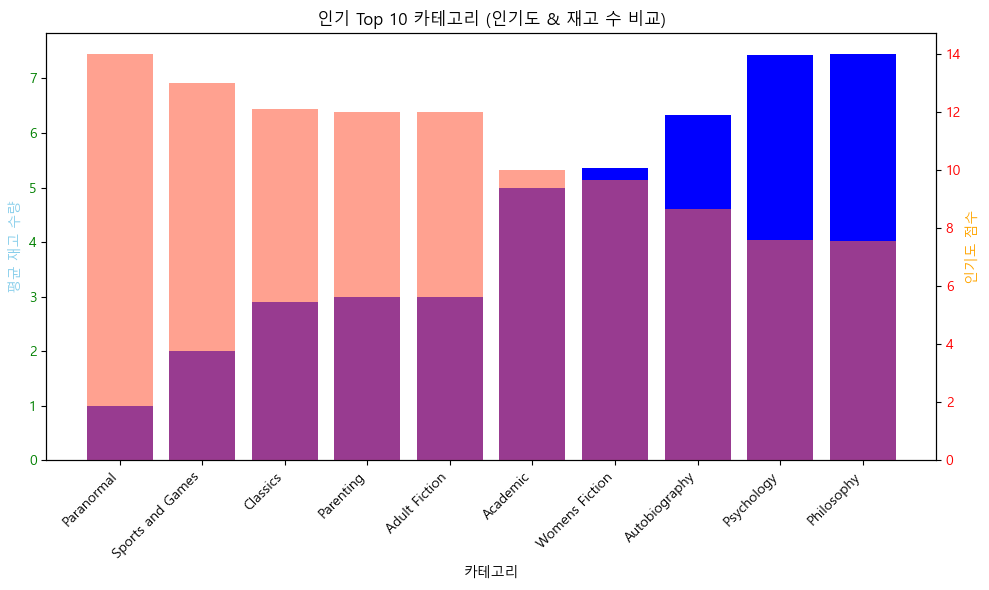

In [79]:
# 2중 Y축 시각화
df = pd.read_excel('book.xlsx')
avg_stock_by_category = df.groupby('category')['in_stock'].mean().sort_values()
top10_popular_categories = avg_stock_by_category.head(10)

# 인기도 점수 = 최대 평균 재고수 - 해당 카터고리의 평균 재고수
max_stock = avg_stock_by_category.max()
popularity_score = max_stock - top10_popular_categories

fig, ax1 = plt.subplots(figsize=(10, 6))

# 평균재고수량 - 한폭 y축
ax1.bar(top10_popular_categories. index, top10_popular_categories.values,
color='blue', label='평균 재고 수량')
ax1.set_ylabel('평균 재고 수량', color='skyblue')
ax1.tick_params(axis='y', labelcolor='green' )
ax1.set_xlabel('카테고리')
ax1.set_title('인기 Top 10 카테고리 (인기도 & 재고 수 비교)')
ax1.set_xticklabels(top10_popular_categories.index, rotation=45, ha='right')

# 인기도- 바깔쪽 y축
ax2 = ax1.twinx()
ax2.bar(top10_popular_categories. index, popularity_score.values,
color='tomato', alpha=0.6,label='인기도 점수')
ax2.set_ylabel('인기도 점수', color='orange')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.show()

In [7]:
# 구매자 고유 넘버 혹은 이름, 나이, 구매내역
# buyers

import pandas as pd
import matplotlib.pyplot as plt

books_df = pd.read_excel('book.xlsx')
buyers_df = pd.read_excel('buyers.xlsx')

buyers_df['age_group'] = (buyers_df['buyer_age']//10) * 10
buyers_df['age_group'] = buyers_df['age_group'].astype(str) + "대"

# 18 -> 100
# 23 // 10 = 2

merged_df = pd.merge(
buyers_df,
books_df[['name', 'category' ]],
how='left',
left_on='book_purchased',
right_on='name'
)

In [17]:
count_cate_by_age_group = (
merged_df.groupby(['age_group', 'category'])
.size()
.reset_index(name='count')
.sort_values(['age_group', 'count'], ascending=[True,False]))

In [21]:
top3_by_age_group = count_cate_by_age_group.groupby('age_group').head(3)
pivot_df = top3_by_age_group.pivot(index='age_group', columns='category', values='count').fillna(0)
# pivot(index, columns, values)

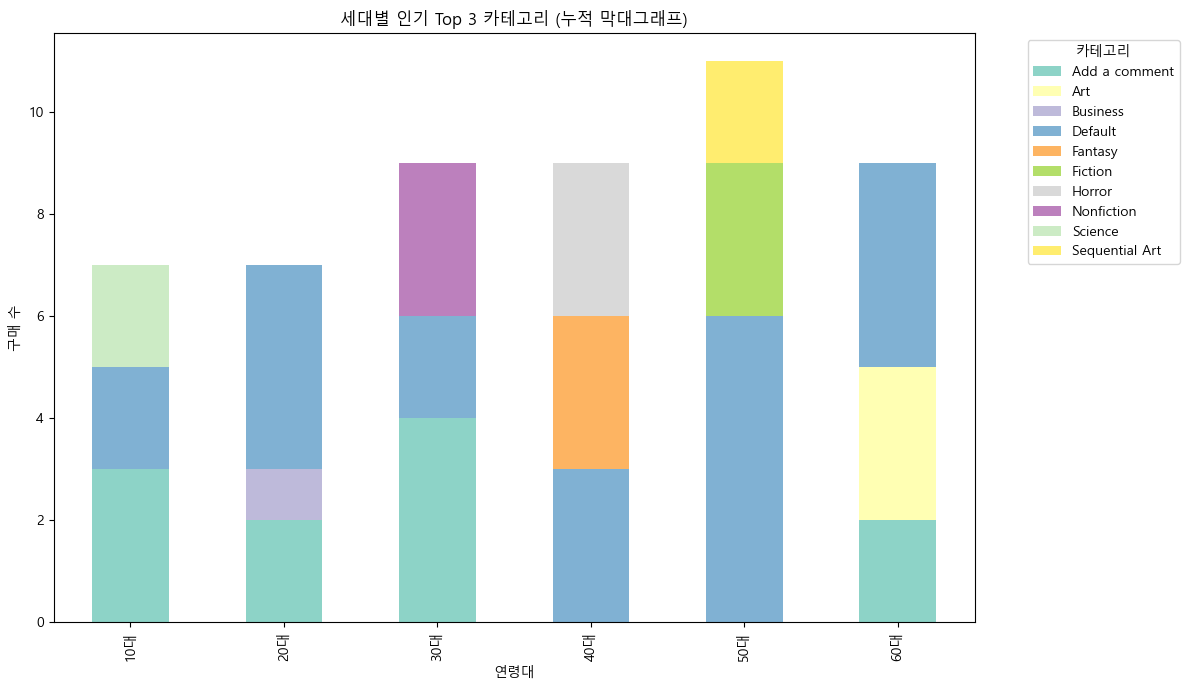

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
pivot_df.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Set3')
plt.title("세대별 인기 Top 3 카테고리 (누적 막대그래프)")
plt.xlabel("연령대")
plt.ylabel("구매 수")
plt.legend(title="카테고리", bbox_to_anchor=(1.05, 1), loc='upper left') 
#0,0 : 원점 // 1,1 : 원점 가장 먼 거리
plt.tight_layout ()
plt.show()

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors

all_maps = plt.colormaps()
print(all_maps)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't